In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
cifar = tf.keras.datasets.cifar10
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar.load_data()
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Loads the CIFAR10 dataset.

This is a dataset of 50,000 32x32 color training images and 10,000 test
images, labeled over 10 categories. See more info at the

The classes are:

Label	Description
- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck

In [ ]:
classes = ["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
classes_mnist =['zero','one','two','three','four','five','six','seven','eight','nine']
print(classes)
print(classes_mnist)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']


In [ ]:
x_train[0:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_train_mnist.shape)
print(x_test_mnist.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### There are total 60,000 images in the cifar-10 dataset each of shape (32,32,3)

### There are total 70,000 images in the MNIST dataset each of shape (28,28)

In [ ]:
def show_image(x_train,y_train,i):
  plt.figure(figsize=(4,5))
  plt.imshow(x_train[i])

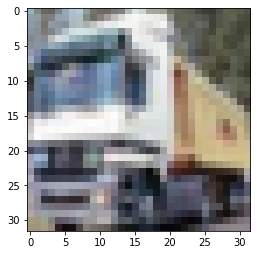

In [ ]:
show_image(x_train,y_train,1)

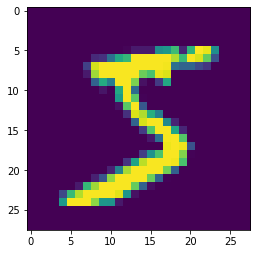

In [ ]:
show_image(x_train_mnist,y_train_mnist,0)

### Images from Each Class

In [ ]:
(x,id) = np.unique(y_train, return_index=True)
print(x)
print(id)

[0 1 2 3 4 5 6 7 8 9]
[29  4  6  9  3 27  0  7  8  1]


In [ ]:
(x_mnist,id_mnist) = np.unique(y_train_mnist, return_index=True)
print(x_mnist)
print(id_mnist)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  2  0 13 15 17  4]


In [ ]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_train_mnist

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### cifar-10 images

Actual Image----------->  airplane



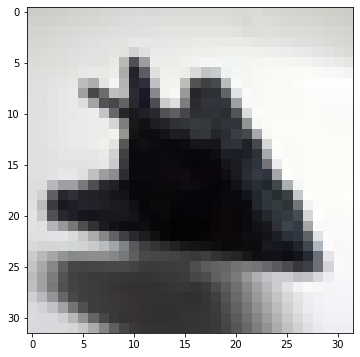


Actual Image----------->  automobile



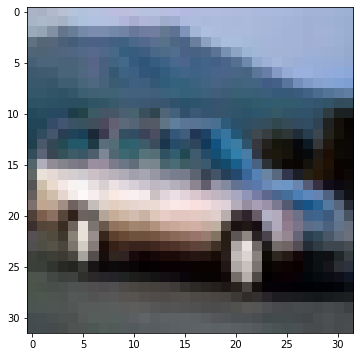


Actual Image----------->  bird



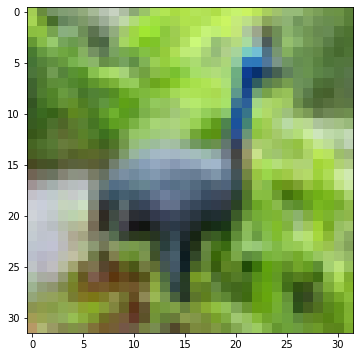


Actual Image----------->  cat



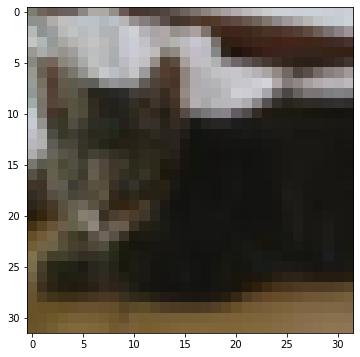


Actual Image----------->  deer



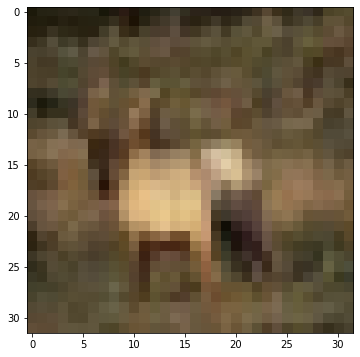


Actual Image----------->  dog



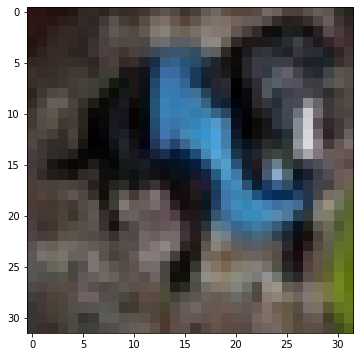


Actual Image----------->  frog



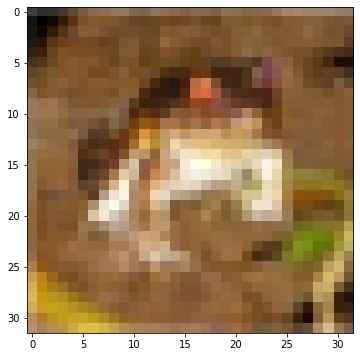


Actual Image----------->  horse



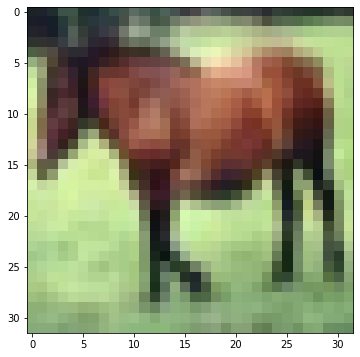


Actual Image----------->  ship



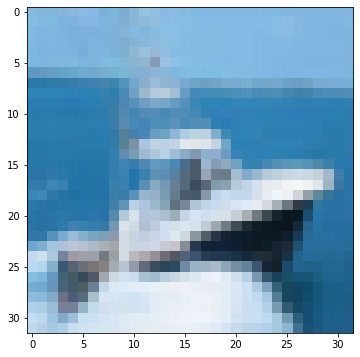


Actual Image----------->  truck



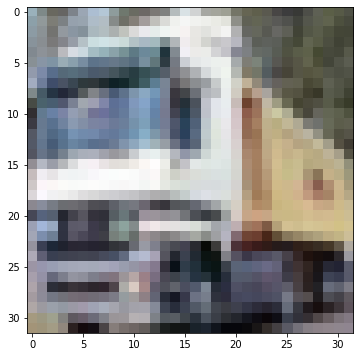

In [ ]:
for i in range(10):
  print("Actual Image-----------> ",classes[y_train[id[i]]])
  print()
  plt.figure(figsize = (6,6))
  plt.imshow(x_train[id[i]],cmap="gray")
  plt.show()
  print()

### MNIST images

Actual Image----------->  zero



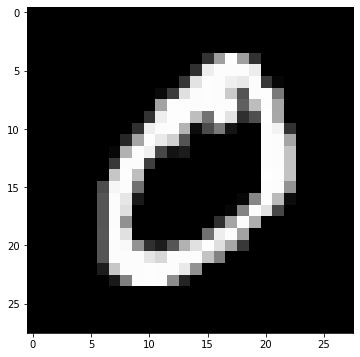


Actual Image----------->  one



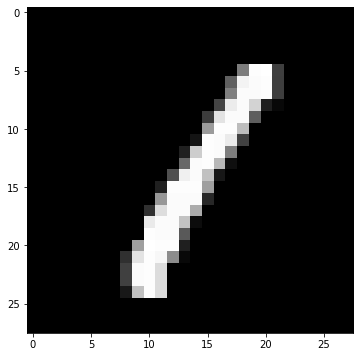


Actual Image----------->  two



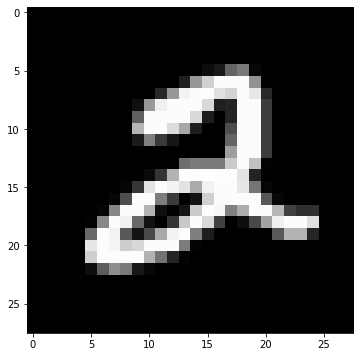


Actual Image----------->  three



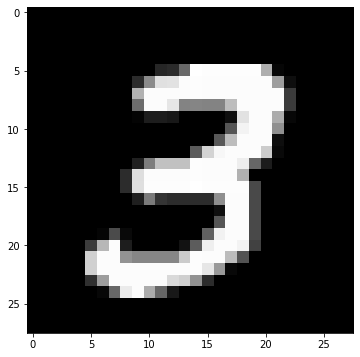


Actual Image----------->  four



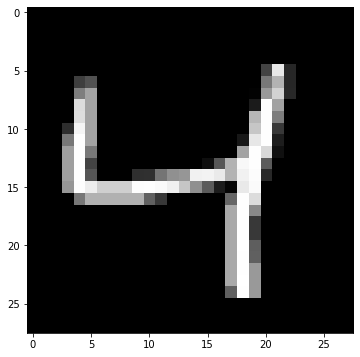


Actual Image----------->  five



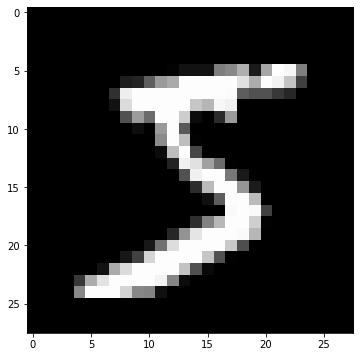


Actual Image----------->  six



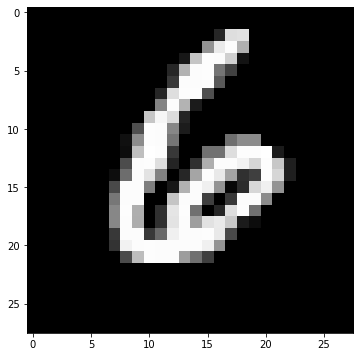


Actual Image----------->  seven



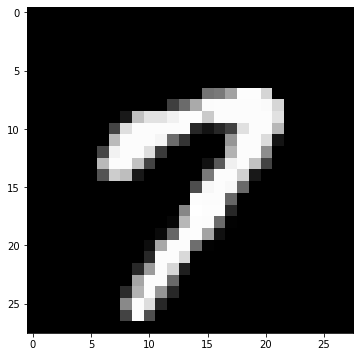


Actual Image----------->  eight



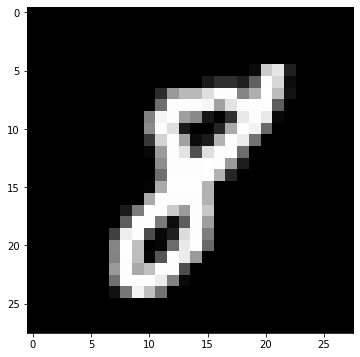


Actual Image----------->  nine



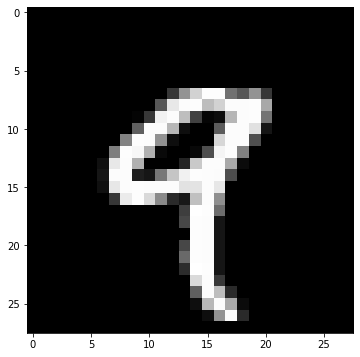

In [ ]:
for i in range(10):
  print("Actual Image-----------> ",classes_mnist[y_train_mnist[id_mnist[i]]])
  print()
  plt.figure(figsize = (6,6))
  plt.imshow(x_train_mnist[id_mnist[i]],cmap="gray")
  plt.show()
  print()

In [ ]:
train_count = pd.DataFrame(y_train)
test_count = pd.DataFrame(y_test)

In [ ]:
train_count.value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [ ]:
test_count.value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

## There are 6000 images for Every class in the cif-ar-10 dataset

In [ ]:
train_mnist_count = pd.DataFrame(y_train_mnist)
test_mnist_count = pd.DataFrame(y_test_mnist)

In [ ]:
train_mnist_count.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
test_mnist_count.value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

### Normalization Of the Data:
##### Normalizing image step is required which ensures that each input parameter pixels has a similar data distribution. This makes convergence faster while training the network.

#### Method:1 (Min-Max Normalization)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train_mnist = x_train_mnist/255
x_test_mnist = x_test_mnist/255

1. Design a CNN with:
- a) One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0
- b) One Pooling layer which uses MAXPOOLING with stride =2.
- c) One hidden layer having number of neurons = 100

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))   # one convolution layer
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2),strides =(2,2)))   # one maxpooling layer
model1.add(tf.keras.layers.Dropout(0.2))

model1.add(tf.keras.layers.Flatten(name ="Input_Layer"))  # Flatten ensures that the inputted image which is in 2-d it will flatten it to 1-D.
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(100,activation = "relu",name = "Hidden_Layer_1"))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer"))



In [ ]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 Input_Layer (Flatten)       (None, 6272)              0         
                                                                 
 dropout_2 (Dropout)         (None, 6272)              0         
                                                        

In [ ]:
history1 = model1.fit(x_train, y_train, epochs=20,batch_size=64,validation_data = (x_test,y_test))

Epoch 1/20
782/782 [==============================] - 16s 5ms/step - loss: 1.6068 - accuracy: 0.4220 - val_loss: 1.3872 - val_accuracy: 0.5176
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 1.3730 - accuracy: 0.5072 - val_loss: 1.3347 - val_accuracy: 0.5397
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 1.2772 - accuracy: 0.5432 - val_loss: 1.1992 - val_accuracy: 0.5835
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 1.2061 - accuracy: 0.5704 - val_loss: 1.1566 - val_accuracy: 0.6071
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 1.1583 - accuracy: 0.5903 - val_loss: 1.1401 - val_accuracy: 0.6029
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 1.1106 - accuracy: 0.6060 - val_loss: 1.1086 - val_accuracy: 0.6234
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 1.0808 - accuracy: 0.6154 - val_loss: 1.0545 - val_accuracy: 0.6371
Epoch

In [ ]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9780 - accuracy: 0.6636


[0.9780198335647583, 0.6636000275611877]

In [ ]:
model1_mnist = tf.keras.models.Sequential()
model1_mnist.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)))   # one convolution layer
model1_mnist.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2),strides =2))   # one maxpooling layer
model1_mnist.add(tf.keras.layers.Dropout(0.2))

model1_mnist.add(tf.keras.layers.Flatten(name ="Input_Layer"))  # Flatten ensures that the inputted image which is in 2-d it will flatten it to 1-D.
model1_mnist.add(tf.keras.layers.Dense(100,activation = "relu",name = "Hidden_Layer_1"))

model1_mnist.add(tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer"))



In [ ]:
model1_mnist.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model1_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 Input_Layer (Flatten)       (None, 4608)              0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 100)               460900    
                                                                 
 Output_Layer (Dense)        (None, 10)                1010      
                                                      

In [ ]:
history1_mnist = model1_mnist.fit(x_train_mnist, y_train_mnist, epochs=15,batch_size=32,validation_data = (x_test_mnist,y_test_mnist))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1442 - accuracy: 0.9568 - val_loss: 0.0526 - val_accuracy: 0.9845
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.0411 - val_accuracy: 0.9865
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0388 - val_accuracy: 0.9880
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0381 - val_accuracy: 0.9880
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0506 - val_accuracy: 0.9850
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0154 - accuracy: 0.9947 - val_loss: 0.0394 - val_accuracy: 0.9884
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0462 - val_accuracy:

In [ ]:
model1_mnist.evaluate(x_test_mnist,y_test_mnist)

313/313 [==============================] - 1s 2ms/step - loss: 0.0472 - accuracy: 0.9907


[0.047245193272829056, 0.9907000064849854]

In [ ]:
# cifar-10
y_pred1 = model1.predict(x_test,batch_size = 32)
y_pred1 = np.argmax(y_pred1, axis=1)
# argmax Returns the indices of the maximum values along an axis.
y_pred1

array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
# mnist
y_pred1_mnist = model1_mnist.predict(x_test_mnist,batch_size = 32)
y_pred1_mnist = np.argmax(y_pred1_mnist, axis=1)
# argmax Returns the indices of the maximum values along an axis.
y_pred1_mnist

array([7, 2, 1, ..., 4, 5, 6])

model1 for cifar-10 dataset


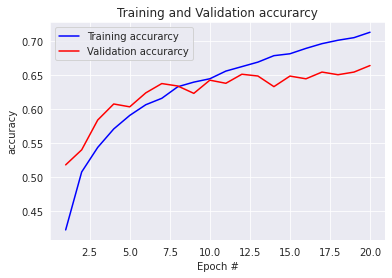

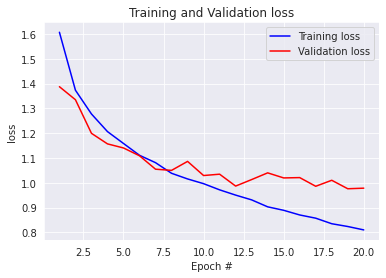



model1 for mnist dataset


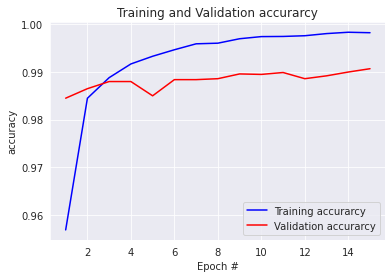

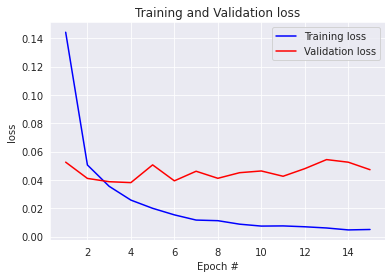

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

print("model1 for cifar-10 dataset")

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()



print()
print()

print("model1 for mnist dataset")

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history1_mnist.history['accuracy']
val_acc = history1_mnist.history['val_accuracy']
loss = history1_mnist.history['loss']
val_loss = history1_mnist.history['val_loss']

epochs = range(1, len(acc) + 1)



#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

2. Design a CNN with:
- a) Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1 and,
padding =0
- b) One Pooling layer which uses MAXPOOLING with stride =2.
- c) One hidden layer having number of neurons = 100


In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))   # one convolution layer
model2.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))   # second convolution layer
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2),strides =2))   # one maxpooling layer
model2.add(tf.keras.layers.Dropout(0.2))

model2.add(tf.keras.layers.Flatten(name ="Input_Layer"))  # Flatten ensures that the inputted image which is in 2-d it will flatten it to 1-D.
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(100,activation = "relu",name = "Hidden_Layer_1"))
model2.add(tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer"))



In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout_5 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 Input_Layer (Flatten)       (None, 6272)              0         
                                                      

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=15,batch_size=22,validation_data = (x_test,y_test))

Epoch 1/15
2273/2273 [==============================] - 10s 4ms/step - loss: 1.4003 - accuracy: 0.4968 - val_loss: 1.1751 - val_accuracy: 0.5829
Epoch 2/15
2273/2273 [==============================] - 9s 4ms/step - loss: 1.0725 - accuracy: 0.6200 - val_loss: 0.9961 - val_accuracy: 0.6579
Epoch 3/15
2273/2273 [==============================] - 10s 4ms/step - loss: 0.9502 - accuracy: 0.6625 - val_loss: 0.9907 - val_accuracy: 0.6546
Epoch 4/15
2273/2273 [==============================] - 9s 4ms/step - loss: 0.8716 - accuracy: 0.6923 - val_loss: 0.9375 - val_accuracy: 0.6764
Epoch 5/15
2273/2273 [==============================] - 9s 4ms/step - loss: 0.8036 - accuracy: 0.7174 - val_loss: 0.9419 - val_accuracy: 0.6706
Epoch 6/15
2273/2273 [==============================] - 9s 4ms/step - loss: 0.7485 - accuracy: 0.7347 - val_loss: 0.9089 - val_accuracy: 0.6819
Epoch 7/15
2273/2273 [==============================] - 9s 4ms/step - loss: 0.6997 - accuracy: 0.7511 - val_loss: 0.9092 - val_accurac

In [ ]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9480 - accuracy: 0.6922


[0.9479884505271912, 0.6922000050544739]

In [ ]:
model2_mnist = tf.keras.models.Sequential()
model2_mnist.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))   # one convolution layer
model2_mnist.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))   # second convolution layer

model2_mnist.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2),strides =2))   # one maxpooling layer
model2_mnist.add(tf.keras.layers.Dropout(0.2))

model2_mnist.add(tf.keras.layers.Flatten(name ="Input_Layer"))  # Flatten ensures that the inputted image which is in 2-d it will flatten it to 1-D.

model2_mnist.add(tf.keras.layers.Dense(100,activation = "relu",name = "Hidden_Layer_1"))
model2_mnist.add(tf.keras.layers.Dropout(0.2))
model2_mnist.add(tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer"))



In [ ]:
model2_mnist.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model2_mnist.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f518e043e90>>

In [ ]:
history2_mnist = model2_mnist.fit(x_train_mnist, y_train_mnist, epochs=15,batch_size=32,validation_data = (x_test_mnist,y_test_mnist))

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1358 - accuracy: 0.9582 - val_loss: 0.0437 - val_accuracy: 0.9857
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0404 - val_accuracy: 0.9879
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0354 - val_accuracy: 0.9889
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0286 - val_accuracy: 0.9909
Epoch 5/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0299 - val_accuracy: 0.9911
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0290 - val_accuracy: 0.9903
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0248 - val_accuracy:

In [ ]:
model2_mnist.evaluate(x_test_mnist,y_test_mnist)

313/313 [==============================] - 1s 2ms/step - loss: 0.0337 - accuracy: 0.9914


[0.03372557833790779, 0.9914000034332275]

In [ ]:
y_pred2 = model2.predict(x_test,batch_size = 32)
y_pred2 = np.argmax(y_pred2, axis=1)
# argmax Returns the indices of the maximum values along an axis.
y_pred2

array([3, 8, 0, ..., 5, 1, 7])

In [ ]:
y_pred2_mnist = model2_mnist.predict(x_test_mnist,batch_size = 32)
y_pred2_mnist = np.argmax(y_pred2_mnist, axis=1)
# argmax Returns the indices of the maximum values along an axis.
y_pred2_mnist

array([7, 2, 1, ..., 4, 5, 6])

model2 for cifar-10 dataset


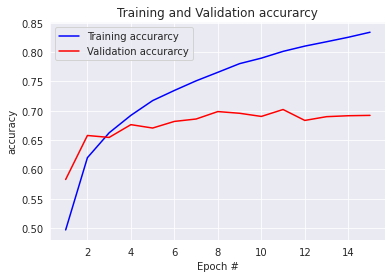

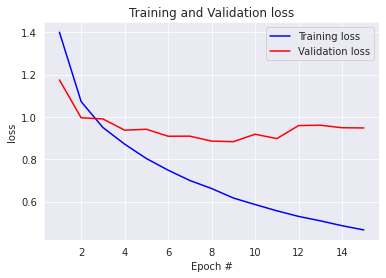



model2 for mnist dataset


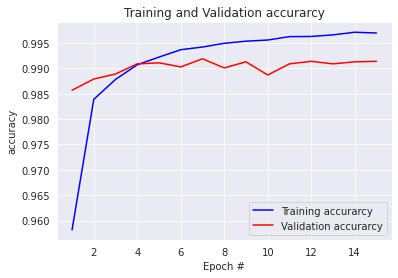

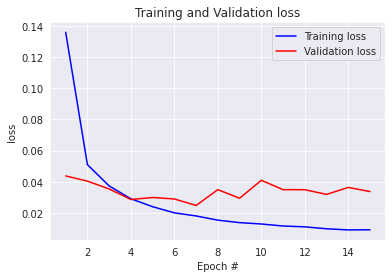

In [ ]:
print("model2 for cifar-10 dataset")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


print()
print()
print("model2 for mnist dataset")


sns.set_style("darkgrid")
#get the details form the history1 object
acc = history2_mnist.history['accuracy']
val_acc = history2_mnist.history['val_accuracy']
loss = history2_mnist.history['loss']
val_loss = history2_mnist.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


##3. Design the LeNet-5 architecture (see fig below)


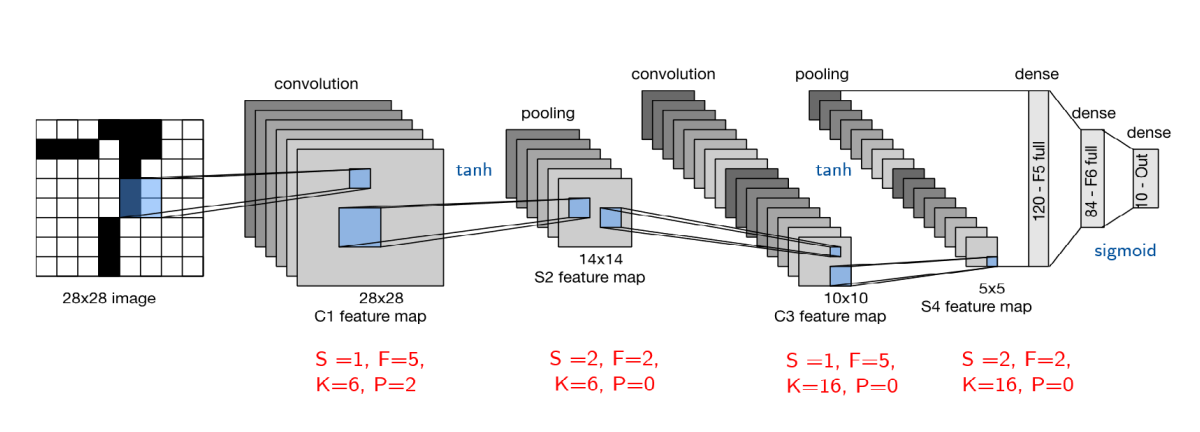

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3)))   # one convolution layer
model3.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2),strides =2))

model3.add(tf.keras.layers.Conv2D(16, (5, 5), activation='tanh'))   #  convolution layer
model3.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2),strides =2))   #  maxpooling layer
model3.add(tf.keras.layers.Dropout(0.15))

model3.add(tf.keras.layers.Flatten(name ="Input_Layer"))  # Flatten ensures that the inputted image which is in 2-d it will flatten it to 1-D.
model3.add(tf.keras.layers.Dense(120,activation = "relu",name = "Hidden_Layer_1"))
model3.add(tf.keras.layers.Dropout(0.15))
model3.add(tf.keras.layers.Dense(84,activation = "sigmoid",name = "Hidden_Layer_2"))
model3.add(tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer"))



In [ ]:
# compiling and training our model
model3.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

batch_size = 32
epochs = 20

history3= model3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data = (x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6344 - accuracy: 0.4067 - val_loss: 1.3671 - val_accuracy: 0.5079
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3649 - accuracy: 0.5087 - val_loss: 1.2469 - val_accuracy: 0.5563
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2722 - accuracy: 0.5428 - val_loss: 1.2017 - val_accuracy: 0.5710
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2107 - accuracy: 0.5680 - val_loss: 1.1569 - val_accuracy: 0.5870
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1571 - accuracy: 0.5860 - val_loss: 1.1033 - val_accuracy: 0.6081
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1147 - accuracy: 0.6030 - val_loss: 1.0802 - val_accuracy: 0.6204
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0861 - accuracy: 0.6144 - val_loss: 1.0794 - val_accuracy:

In [ ]:
#evaluating the model
model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0000 - accuracy: 0.6570


[1.0000113248825073, 0.6570000052452087]

In [ ]:
model3_mnist = tf.keras.models.Sequential()
model3_mnist.add(tf.keras.layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)))   # one convolution layer
model3_mnist.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2),strides =2))

model3_mnist.add(tf.keras.layers.Conv2D(16, (5, 5), activation='tanh'))   #  convolution layer
model3_mnist.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2),strides =2))   #  maxpooling layer
model3_mnist.add(tf.keras.layers.Dropout(0.2))

model3_mnist.add(tf.keras.layers.Flatten(name ="Input_Layer"))  # Flatten ensures that the inputted image which is in 2-d it will flatten it to 1-D.
model3_mnist.add(tf.keras.layers.Dense(120,activation = "relu",name = "Hidden_Layer_1"))
model3_mnist.add(tf.keras.layers.Dropout(0.2))
model3_mnist.add(tf.keras.layers.Dense(84,activation = "sigmoid",name = "Hidden_Layer_2"))
model3_mnist.add(tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer"))



In [ ]:
model3_mnist.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
history3_mnist = model3_mnist.fit(x_train_mnist, y_train_mnist, epochs=10,batch_size=32,validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3105 - accuracy: 0.9096 - val_loss: 0.0770 - val_accuracy: 0.9775
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1094 - accuracy: 0.9670 - val_loss: 0.0597 - val_accuracy: 0.9827
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0827 - accuracy: 0.9743 - val_loss: 0.0523 - val_accuracy: 0.9857
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0700 - accuracy: 0.9782 - val_loss: 0.0420 - val_accuracy: 0.9865
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0380 - val_accuracy: 0.9888
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0513 - accuracy: 0.9835 - val_loss: 0.0389 - val_accuracy:

In [ ]:
model3_mnist.evaluate(x_test_mnist,y_test_mnist)

313/313 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9912


[0.03035694919526577, 0.9911999702453613]

model3 for cifar-10 dataset


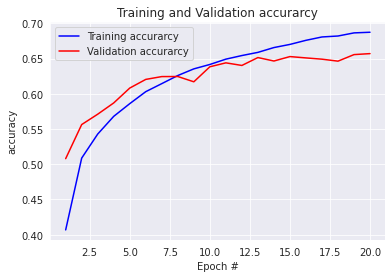

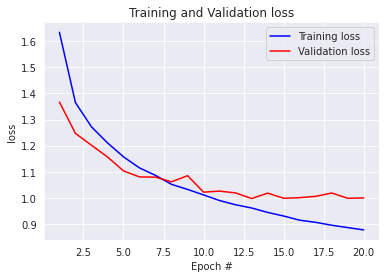



model3 for mnist dataset


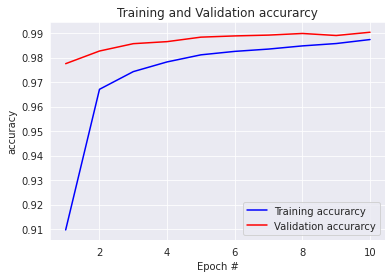

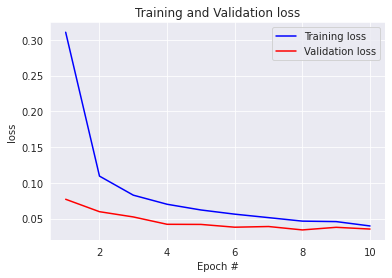

In [ ]:
print("model3 for cifar-10 dataset")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


print()
print()
print("model3 for mnist dataset")


sns.set_style("darkgrid")
#get the details form the history1 object
acc = history3_mnist.history['accuracy']
val_acc = history3_mnist.history['val_accuracy']
loss = history3_mnist.history['loss']
val_loss = history3_mnist.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


## 4. Compare the performances of the above three architectures with respect to the two datasets

### For the MNIST Dataset, all the above 3 CNN designs work well with almost 98% accuracy.

### For the CIFAR-10 Dataset, 2nd CNN design with accuracy of 69% is performing better compared to the remaining two models. But all the 3 designs perform with an accuracy less than 70%.